In [18]:
import pandas as pd
import numpy as np
from pool.error_analysis import VisionErrorAnalysis, DebugErrorAnalysis

ea=VisionErrorAnalysis()
dea=DebugErrorAnalysis()
data = pd.read_csv('./results/error_data_0.5_mm.csv', sep=',',decimal='.')
data=data.dropna()     #drop all rows that have any NaN values
data.head()

,real_point_id,C_x,C_y,T_x,T_y,estimated_point_id,C_estimated_x,C_estimated_y,T_estimated_x,T_estimated_y,...,X_estimated_y,slope_X1T,intercept_X1T,slope_X2T,intercept_X2T,X_calculated_x,X_calculated_y,Q_x,Q_y,delta
0,0.0,479.886122,92.247552,377.554276,453.711331,0.0,479.531834,92.136056,378.141998,453.971809,...,450.448173,0.176354,387.128254,0.396182,304.131128,415.529318,455.088338,34.276343,441.263784,44.539014
1,0.0,479.886122,92.247552,377.554276,453.711331,1.0,479.620936,91.650392,377.205843,453.966190,...,450.432278,0.176354,387.128254,0.396182,304.131128,415.412958,450.437159,38.207557,483.059401,2.558924
2,0.0,479.886122,92.247552,377.554276,453.711331,2.0,480.319307,92.738437,378.082990,453.777577,...,450.231884,0.176354,387.128254,0.396182,304.131128,415.394964,450.235366,38.377612,484.867377,0.742968
3,0.0,479.886122,92.247552,377.554276,453.711331,3.0,479.812880,91.858167,377.947776,453.899383,...,450.365746,0.176354,387.128254,0.396182,304.131128,415.536419,452.546524,36.431105,464.172632,21.529054
4,0.0,479.886122,92.247552,377.554276,453.711331,4.0,480.105839,92.895120,377.629067,453.561506,...,449.987220,0.176354,387.128254,0.396182,304.131128,415.277794,449.135728,39.306071,494.738501,9.171725


### Check a specific configuration

Each row of the dataset represents the resut a random shot with an error due to the vision system

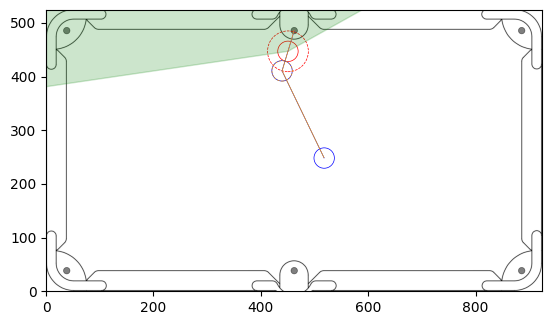

In [19]:
import matplotlib.pyplot as plt

real_point_id=1234
estimated_point_id=10 
fig, ax = plt.subplots()
ax.set_xlim((0, dea.pool_table_size[0]))
ax.set_ylim((0, dea.pool_table_size[1]))

sub_data=data[(data['real_point_id']==real_point_id)]
rows=sub_data.to_dict('records')
ax=dea.draw_pool_table_with_pockets(ax)
# we read from first row of sub_data, since the following rows will be the same:
row=rows[estimated_point_id]
ax=dea.draw_ideal_configuration(ax,row)
ax=dea.draw_region_of_interest(ax,row)
ax=dea.draw_real_configuration(ax,row)
ax.plot()  
plt.show()

### Dificulty of the shot

We divide our shots in 3 categories depending on the angle: the closest the angle is to 180 degrees, the better


In [20]:
data['difficulty_angle']=np.pi-data['alpha']-data['beta']
data.loc[(data['difficulty_angle']<np.pi) & (data['difficulty_angle']> (5/6)*np.pi), 'difficulty_category'] = 1
data.loc[(data['difficulty_angle']<(5/6)*np.pi) & (data['difficulty_angle']> (4/6)*np.pi), 'difficulty_category'] = 2
data.loc[(data['difficulty_angle']<(4/6)*np.pi) & (data['difficulty_angle']> (3/6)*np.pi), 'difficulty_category'] = 3

### Visualization of data

Scatter plots of some varaible vs delta

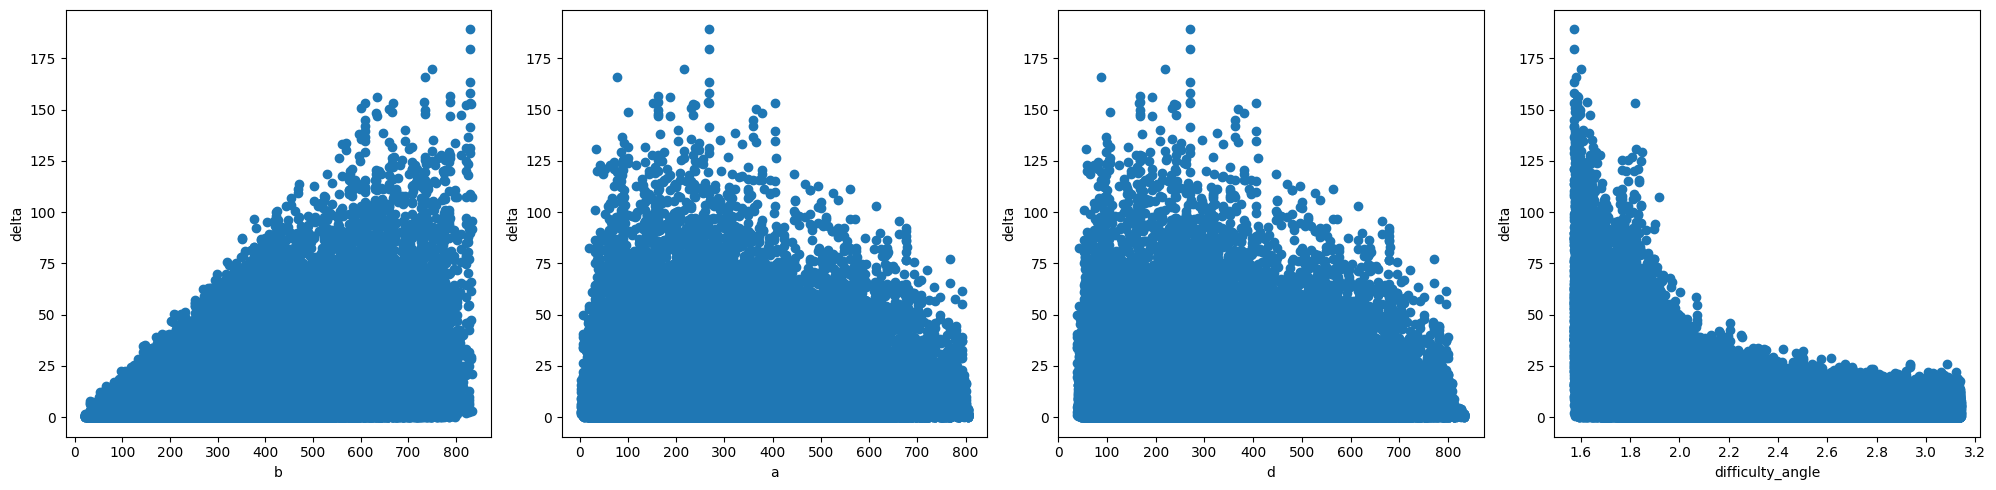

In [21]:
import numpy as np
import matplotlib.pyplot as plt

y = data['delta'].values
x=['b','a','d','difficulty_angle']

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for i,col_name in zip(range(1, columns*rows+1),x):

    x=data[col_name].values
    fig.add_subplot(rows, columns, i)
    plt.scatter(x, y)
    plt.xlabel(col_name)
    plt.ylabel('delta')

plt.tight_layout()
plt.show()

Histograms of delta and its categories

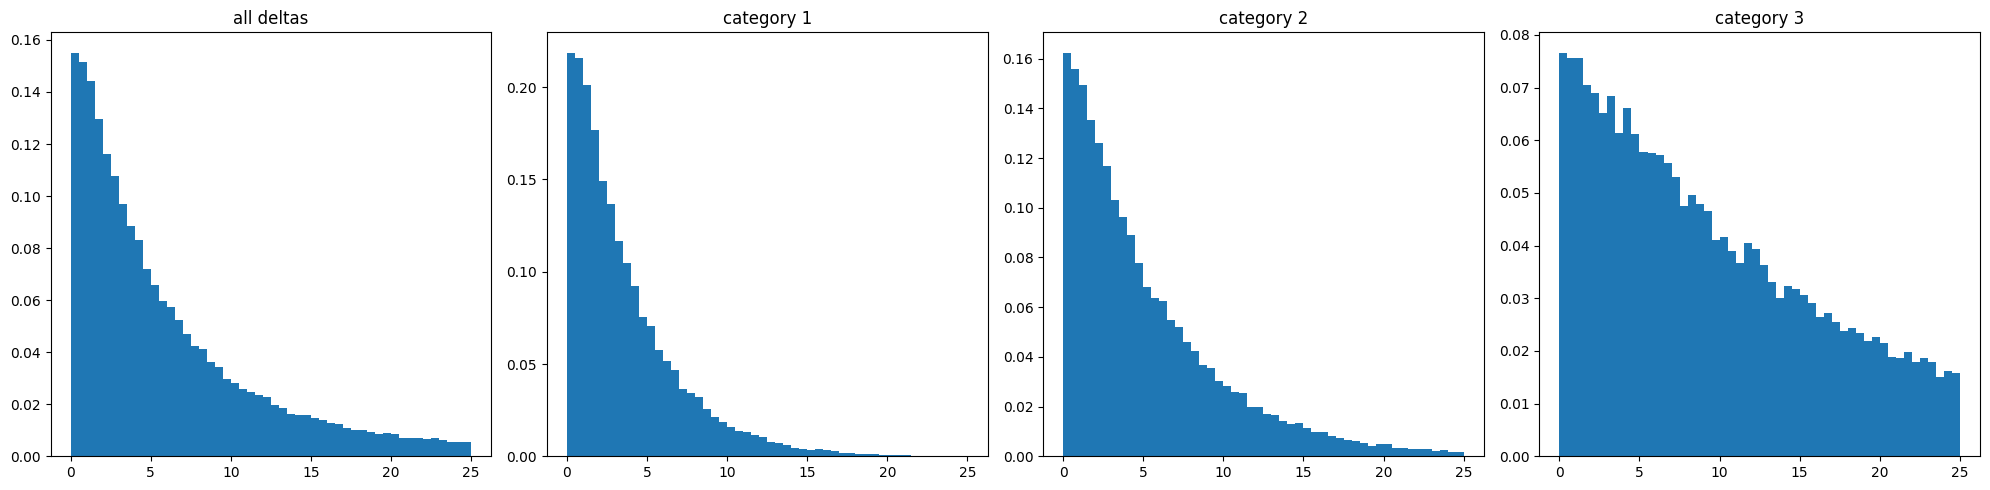

In [22]:
import numpy as np
import matplotlib.pyplot as plt

deltas=data['delta'].values
deltas_category1=data[data['difficulty_category']==1]['delta'].values
deltas_category2=data[data['difficulty_category']==2]['delta'].values
deltas_category3=data[data['difficulty_category']==3]['delta'].values
list_deltas=[deltas,deltas_category1,deltas_category2,deltas_category3]

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for category,i,delta_type in zip(['all deltas', 'category 1', 'category 2', 'category 3'],range(1, columns*rows+1),list_deltas):

    fig.add_subplot(rows, columns, i)
    plt.title(category)
    plt.hist(delta_type, bins=50,range=[0, 25], density=True)

plt.tight_layout()
plt.show()


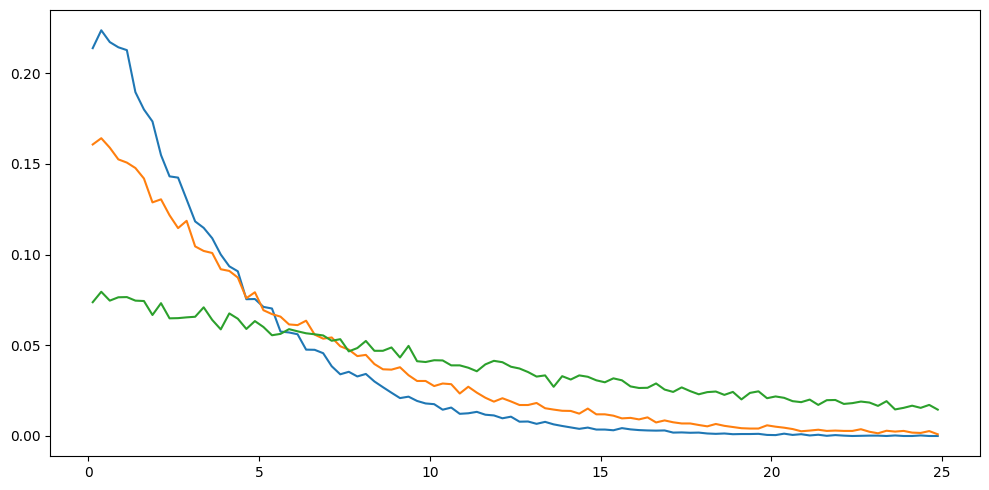

In [23]:
fig = plt.figure(1,figsize=(10, 5))

n,x=np.histogram(deltas_category1, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category2, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category3, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

plt.tight_layout()
plt.show()


### Probability of getting an error below a certain threshold

probability of error below 10mm:  0.9398831677799413


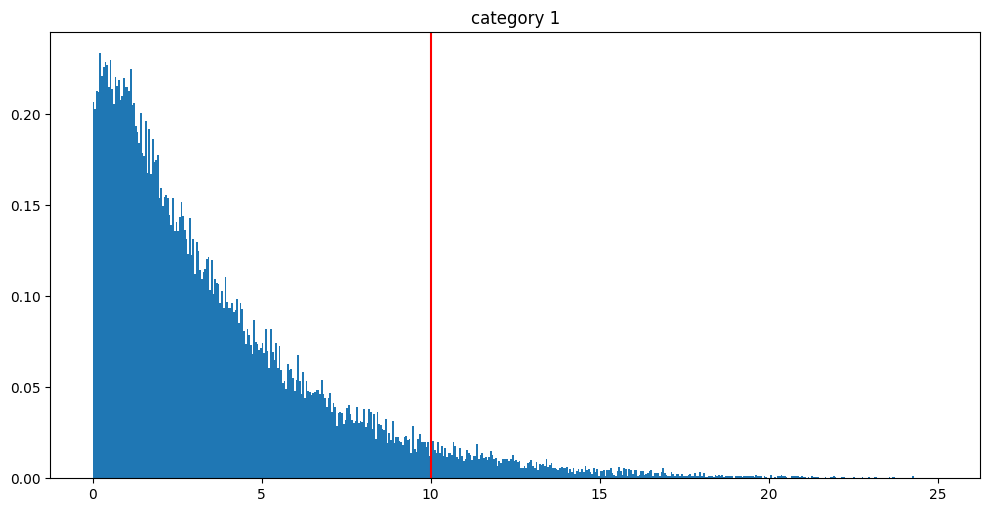

probability of error below 10mm:  0.8509754503873799


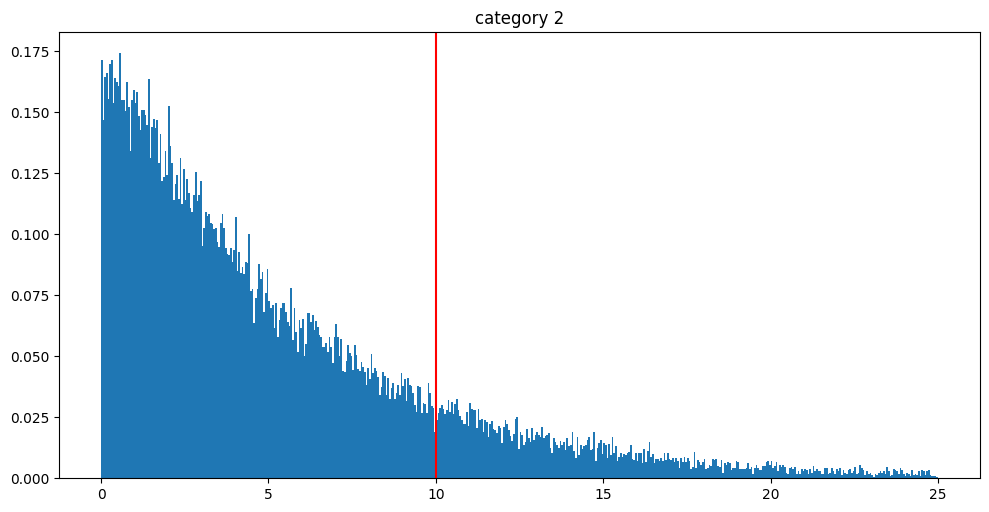

probability of error below 10mm:  0.5994684169130211


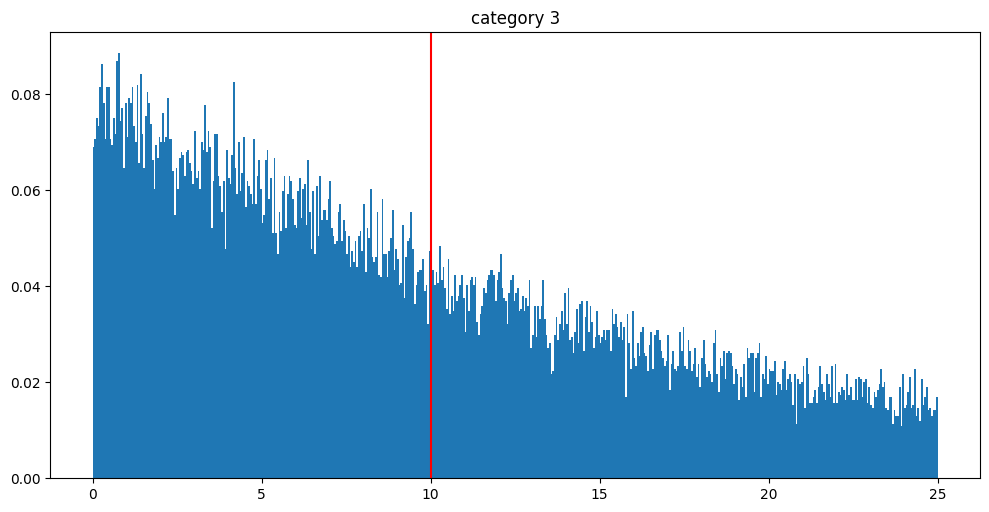

In [24]:
threshold=10
num_bins=500

for category,deltas_category in enumerate([deltas_category1,deltas_category2,deltas_category3]):
    arr_pdf,arr_bins=np.histogram(deltas_category, bins = num_bins,range=[0, 25],density=True)

    #in order to match dimensions of bins and pdf arrays we get rid of last bins element
    arr_bins_cropped=arr_bins[:-1]
    arr_bins_thresholded=arr_bins_cropped[arr_bins_cropped<threshold]

    #in order to have the same dimension between _pdf and np.diff(_bins), _bins need to have one 
    #more element than _pdf (i.e., _pdf need to have one less element than _bins)
    arr_pdf_thresholded=arr_pdf[arr_bins_cropped<threshold][:-1]
    area=np.sum(arr_pdf_thresholded* np.diff(arr_bins_thresholded))
    print(f'probability of error below {threshold}mm: ', area)

    #plot computed probability
    fig = plt.figure(1,figsize=(10, 5))
    plt.hist(deltas_category, bins = num_bins, range=[0, 25],density=True)
    plt.axvline(x=threshold, color='r')
    plt.tight_layout()
    plt.title(f'category {category+1}')
    plt.show()
